# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<Łukasz Kopciński\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [69]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import time

---

In [ ]:
### Funkcje func dfunc ddfunc z pliku main, dla ułatwienia
def func(x: int | float | np.ndarray) -> int | float | np.ndarray:
    
    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )

    return np.exp(-2 * x) + x**2 - 1


def dfunc(x: np.ndarray) -> np.ndarray:
    
    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )

    return -2 * np.exp(-2 * x) + 2 * x


def ddfunc(x: np.ndarray) -> np.ndarray:
    
    if not isinstance(x, (int, float, np.ndarray)):
        raise TypeError(
            f"Argument `x` musi być typu `np.ndarray`, `float` lub `int`, otrzymano: {type(x).__name__}."
        )

    return 4 * np.exp(-2 * x) + 2

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


Text(0.5, 1.0, "F''(x)")

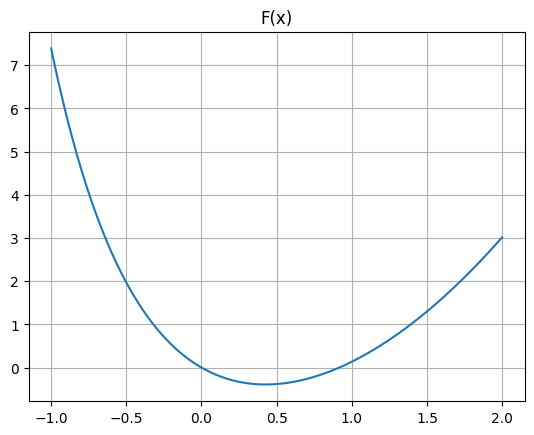

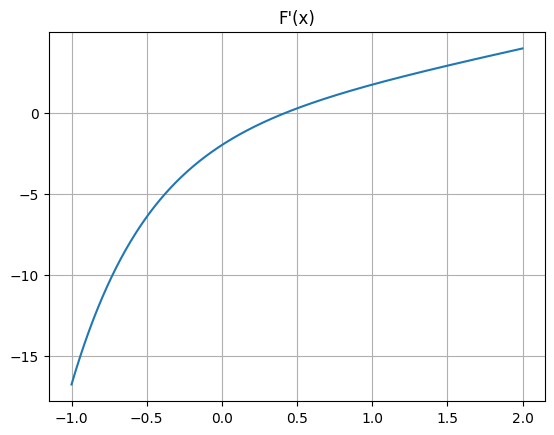

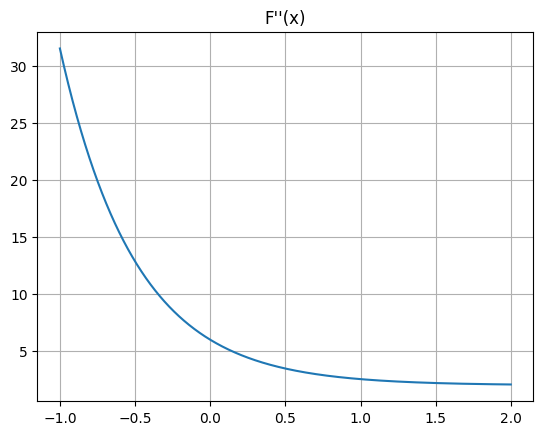

In [12]:
# ===== Twoja implementacja tutaj =====#
t = np.arange(-1, 2, 0.001)

plt.figure(1)
plt.plot(t,func(t))
plt.grid(True)
plt.title("F(x)")

plt.figure(2)
plt.plot(t,dfunc(t))
plt.grid(True)
plt.title("F'(x)")

plt.figure(3)
plt.plot(t,ddfunc(t))
plt.grid(True)
plt.title("F''(x)")



PUNKT 2:
- na podstawie analizy wykresu funkcji f(x) można stwierdzić że jej miejsca zerowe znajdują się w przedziale = [-1, 1.5]

PUNKT 3:
- pierwsza pochodna mówi nam o tym jak zachowuje się funkcja tzn. o jej monotoniczności, jeśli pochodna jest ujemna to funkcja maleje. Za to jeśli pochodna jest dodatnia to funkcja rośnie, zatem na podstawie tej pochodne możemy znaleźć ekstremum lokalne funkcji a w pobliżu jej ekstremum będą miejsca zerowe.
- druga pochodna mówi nam na temat wypukłości funkcji jeśli f'' jest > 0 to funkcja w danym przedziale przypomina U, za to jeśli f'' jest <0 to funkcja przypomina odwrócone U

Podsumowanie:
- obie pochodne nie mówią nam defacto gdzie są miejsca zerowe funkcji.

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

In [66]:
### IMPLEMENTACJA Z MAIN
def bisection(
    a: int | float,
    b: int | float,
    f: Callable[[float], float],
    epsilon: float,
    max_iter: int,
) -> tuple[float, int] | None:
    
    if a >= b:
        return None
    
    try:
        f_a = f(float(a))
        f_b = f(float(b))
    except Exception as e:
        return None
    
    if f_a * f_b > 0:
        return None

    if abs(f_a) < epsilon:
        return (float(a), 0)
    if abs(f_b) < epsilon:
        return (float(b), 0)
    
    iter_count = 0
    current_a = float(a)
    current_b = float(b)

    for i in range(1, max_iter + 1):
        iter_count = i
        
        c = (current_a + current_b) / 2.0
        
        try:
            
            f_c = f(c)
        except Exception as e:
            return None

        if abs(f_c) < epsilon:
            return (c, iter_count)
        
        if f_a * f_c < 0:
            current_b = c

        elif f_c * f_b < 0:
            current_a = c

        else:
            return (c, iter_count)
        
    c_final = (current_a + current_b) / 2.0

    return (c_final, max_iter) 

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


In [41]:
def secant(
    a: int | float,
    b: int | float,
    f: Callable[[float], float],
    epsilon: float,
    max_iters: int,
) -> tuple[float, int] | None:
    
    fa = f(a)
    fb = f(b)

    if fa * fb >= 0:
        return None

    i = 0
    for _ in range(max_iters):
        i += 1

        if fb == fa:
            return None

        
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)

       
        if abs(fc) < epsilon or abs(c - b) < epsilon:
            return c, i

        
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return c, i

---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

In [40]:
def difference_quotient(
    f: Callable[[float], float], x: int | float, h: int | float
) -> float | None:
    
    if h == 0:
        return None

    return (f(x + h) - f(x)) / h


def newton(
    f: Callable[[float], float],
    df: Callable[[float], float],
    ddf: Callable[[float], float],
    a: int | float,
    b: int | float,
    epsilon: float,
    max_iter: int,
) -> tuple[float, int] | None:
    
    if f(a) * ddf(a) > 0:
        x_curr = a
    elif f(b) * ddf(b) > 0:
        x_curr = b
    else:
        x_curr = (a + b) / 2

    iteration = 0
    for _ in range(max_iter):
        iteration += 1

        deriv_val = df(x_curr)
        if deriv_val == 0:
            return None

        x_new = x_curr - f(x_curr) / deriv_val

        if abs(x_new - x_curr) < epsilon or abs(f(x_new)) < epsilon:
            return x_new, iteration

        x_curr = x_new

    return x_curr, iteration

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [31]:
# ===== Twoja implementacja tutaj =====
sol = sp.optimize.root(func, x0=0.5)
print("miejsce zerowe pierwsze:",sol.x)
print("czy znaleziono:",sol.success)

sol = sp.optimize.fsolve(func, x0=0.5)
print("miejsce zerowe pierwsze:", sol)

sol = sp.optimize.root(func, x0=0)
print("miejsce zerowe drugie:",sol.x)
print("czy znaleziono:",sol.success) 

miejsce zerowe pierwsze: [0.91656258]
czy znaleziono: True
miejsce zerowe pierwsze: [0.91656258]
miejsce zerowe drugie: [0.]
czy znaleziono: True


---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

Czas dla metody bisekcji: 0.0007760524749755859 

Czas dla metody siecznych: 0.0008265972137451172 

Czas dla metody newtona: 0.0012569427490234375 



Text(0, 0.5, 'Wynik')

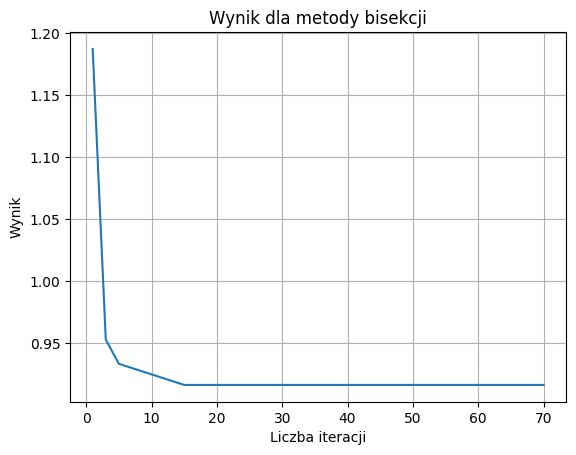

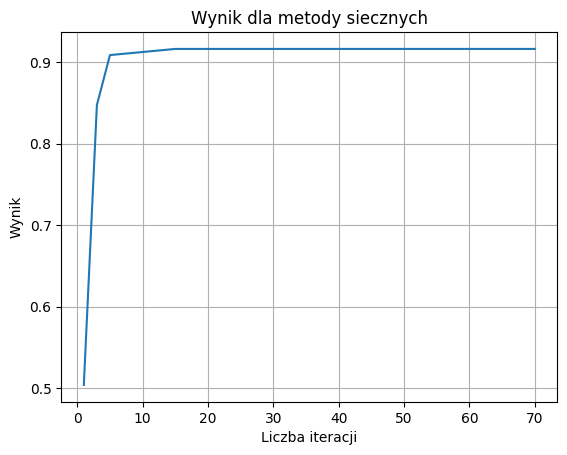

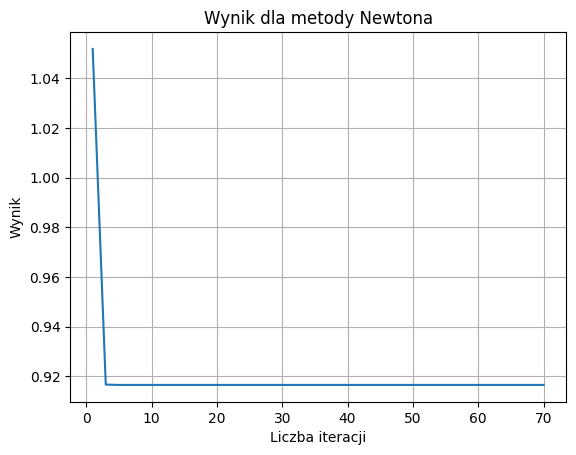

In [73]:
# ===== Twoja implementacja tutaj =====
iter_amount=[1,3,5,15,25,30,35,40,50,70]

#c_biseks, iter_biseks=bisection(-1,0.4,func,1e-10,40)
#print("Miejsce zerowe x2 :",c_biseks,"Liczba iteracji:",iter_biseks,"\n")

###NUMER 1
wynik1=[]
start_time1=time.time()
for i in range(0,10):

    c_biseks, iter_biseks=bisection(0.25,1.5,func,1e-10,iter_amount[i])

    wynik1.append(c_biseks)
end_time1=time.time()

#c,i=secant(-1,0.4,func,1e-10,40)
#print("Miejsce zerowe x1 :",c,"Liczba iteracji:",i,"\n")

###NUMER 2
wynik2=[]
start_time2=time.time()
for i in range(0,10):

    c,i=secant(0.25,1.5,func,1e-10,iter_amount[i])

    wynik2.append(c)
end_time2=time.time()
#x_newton, iter_newton=newton(func,dfunc,ddfunc,-1,0.4,1e-10,40)
#print("Miejsce zerowe x1 :",x_newton,"Liczba iteracji:",iter_newton,"\n")

###NUMER 3
wynik3=[]
start_time3=time.time()
for i in range(0,10):
    x_newton, iter_newton=newton(func,dfunc,ddfunc,0.25,1.5,1e-10,iter_amount[i])

    wynik3.append(x_newton)
end_time3=time.time()

print("Czas dla metody bisekcji:",end_time1-start_time1,"\n")
print("Czas dla metody siecznych:",end_time2-start_time2,"\n")
print("Czas dla metody newtona:",end_time3-start_time3,"\n")
plt.figure(1)
plt.plot(iter_amount,wynik1)
plt.grid(True)
plt.title("Wynik dla metody bisekcji")
plt.xlabel("Liczba iteracji")
plt.ylabel("Wynik")

plt.figure(2)
plt.plot(iter_amount,wynik2)
plt.grid(True)
plt.title("Wynik dla metody siecznych")
plt.xlabel("Liczba iteracji")
plt.ylabel("Wynik")

plt.figure(3)
plt.plot(iter_amount,wynik3)
plt.grid(True)
plt.title("Wynik dla metody Newtona")
plt.xlabel("Liczba iteracji")
plt.ylabel("Wynik")




WNIOSKI:
- z przeprowadzonej analizy wykresów zależności WYNIK-LICZBA ITERACJI, wynika że najlepszą metodąjest metoda newtona. Zabiera ona trochę czasu, jednak daje też najlepsze wyniki z możliwych w najmniejszej liczbie iteracji.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)